# House Data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.stats as stats

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe(include = "O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [9]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.total_rooms.value_counts()

1527.0    18
1613.0    17
1582.0    17
2127.0    16
1703.0    15
          ..
7784.0     1
7916.0     1
6859.0     1
6846.0     1
5639.0     1
Name: total_rooms, Length: 5926, dtype: int64

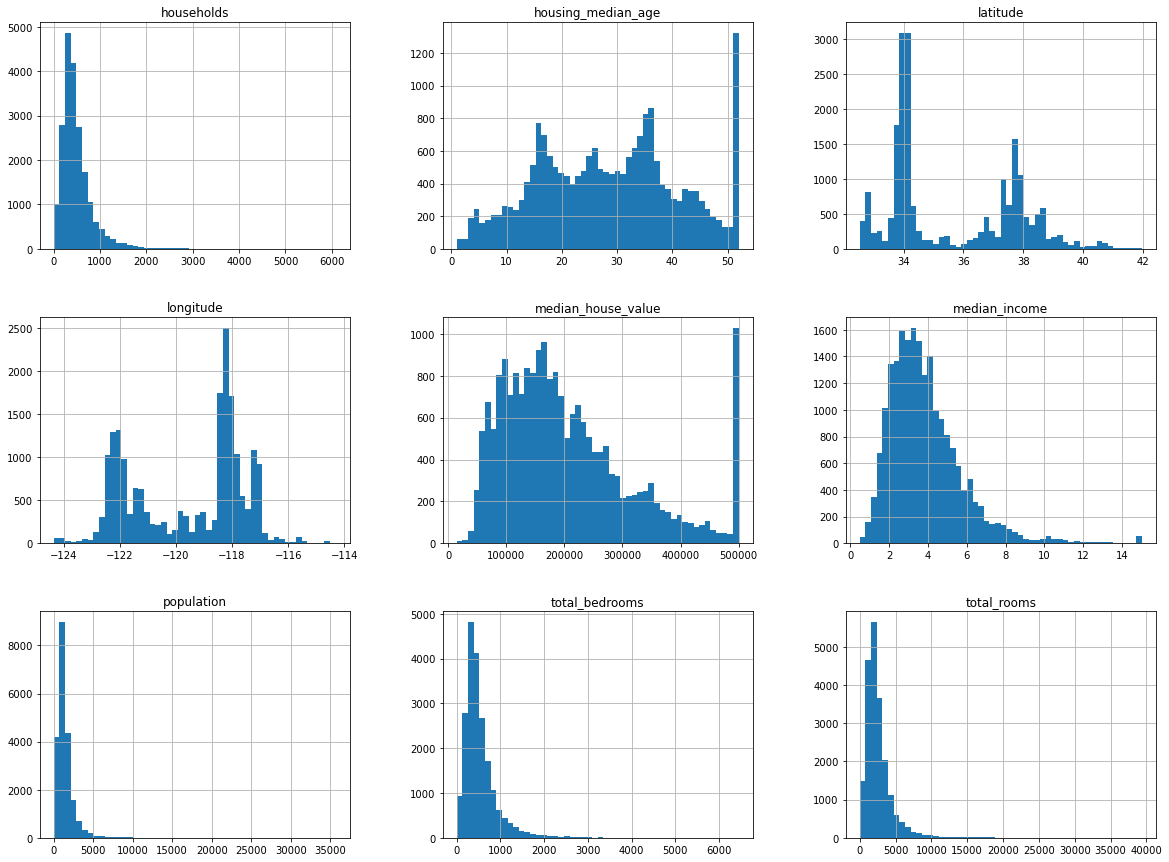

In [11]:
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [12]:
df.dropna(inplace = True)

In [13]:
df['rooms_per_house'] = df.total_rooms.div(df.households)

In [14]:
df['rooms_per_house'].nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_house, dtype: float64

In [15]:
df['rooms_per_house'].nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_house, dtype: float64

In [16]:
df['population_per_house'] = df.population.div(df.households)

## Price relation

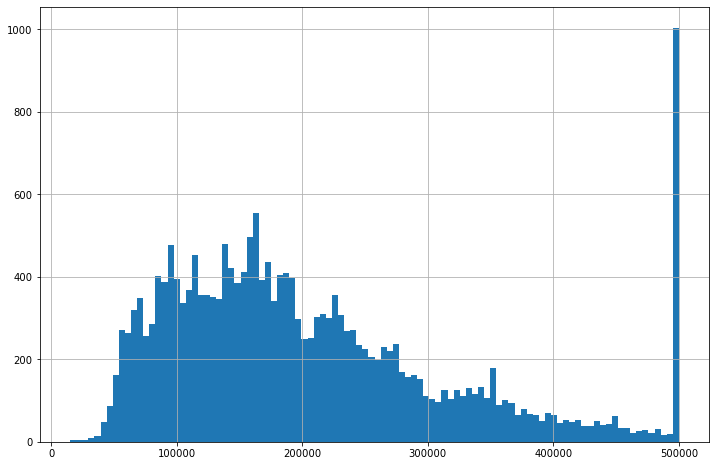

In [17]:
df.median_house_value.hist(bins = 100, figsize =(12,8))
plt.show()

In [18]:
df.corr().median_house_value.sort_values(ascending = True)

latitude               -0.144638
longitude              -0.045398
population             -0.025300
population_per_house   -0.023639
total_bedrooms          0.049686
households              0.064894
housing_median_age      0.106432
total_rooms             0.133294
rooms_per_house         0.151344
median_income           0.688355
median_house_value      1.000000
Name: median_house_value, dtype: float64

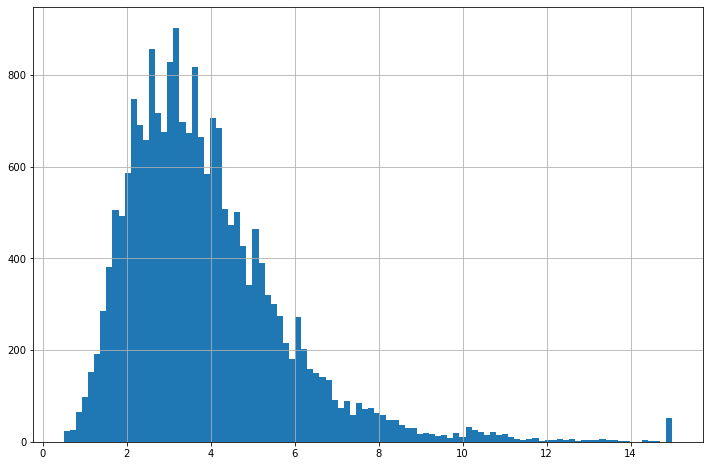

In [19]:
df.median_income.hist(bins = 100, figsize =(12,8))
plt.show()

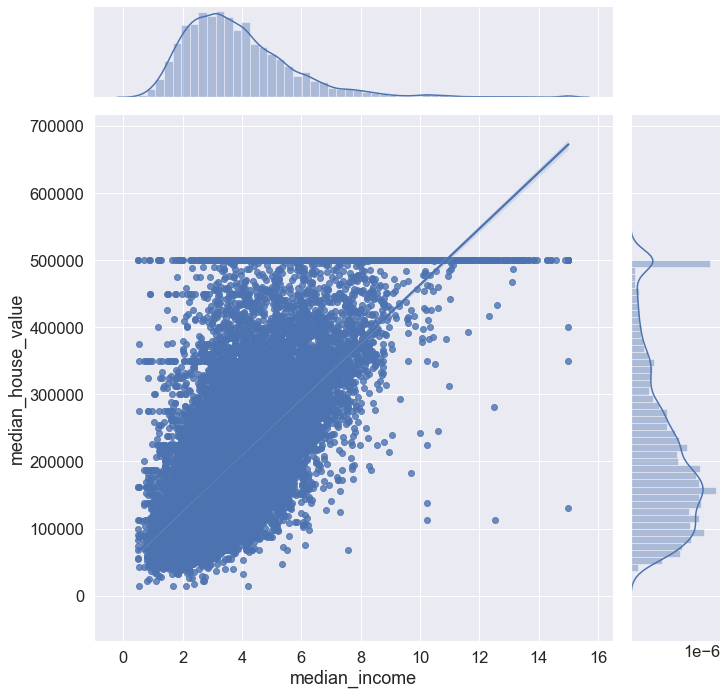

In [20]:
sns.set(font_scale = 1.50)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "reg", height =10)
plt.show()

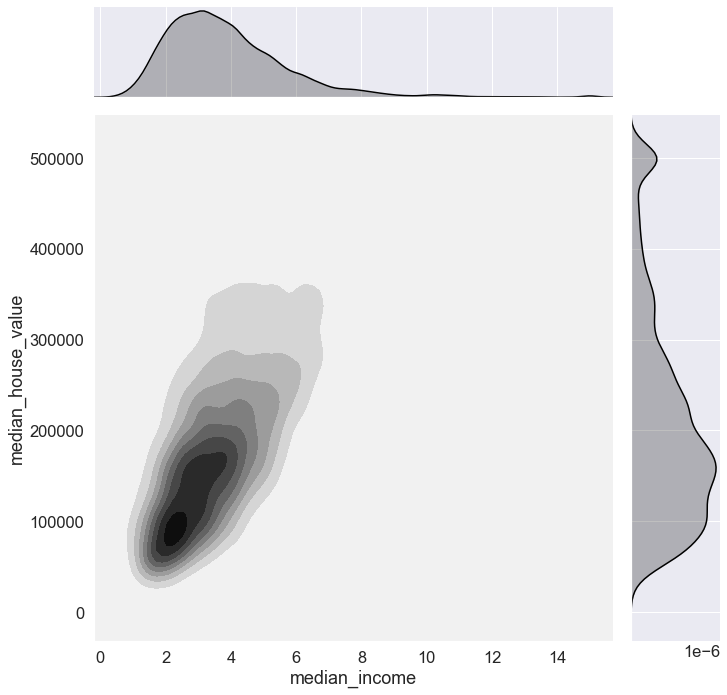

In [21]:
sns.set(font_scale = 1.50)
sns.jointplot(data = df, x = "median_income", y = "median_house_value", kind = "kde", height =10, color = 'black')
plt.show()

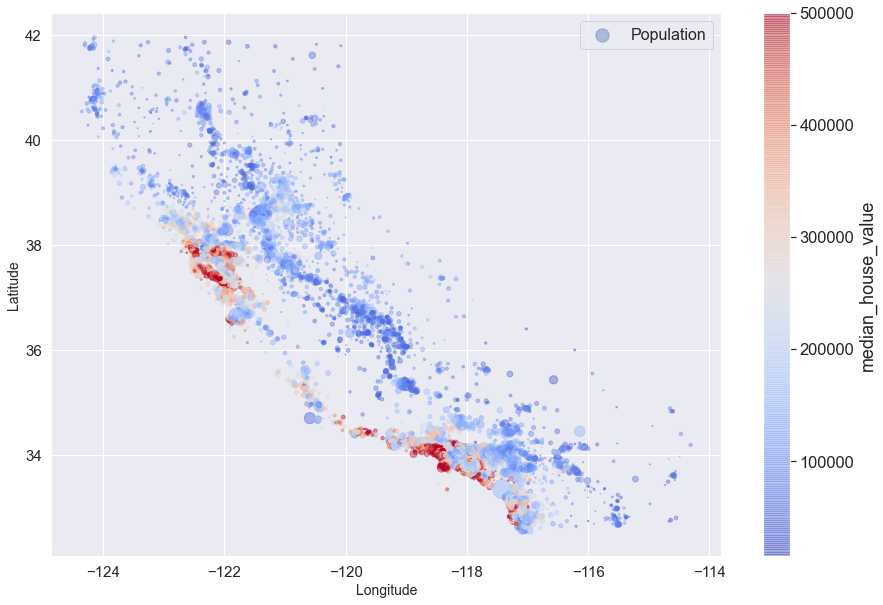

In [22]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [23]:
california_img = mpimg.imread("california.png")
california_img

array([[[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       ...,

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.8274

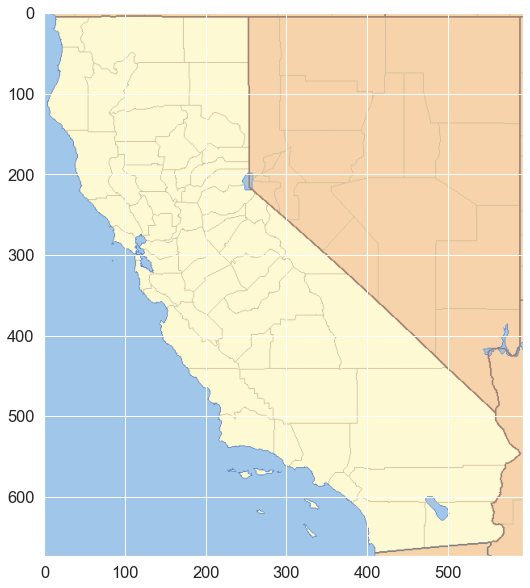

In [24]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img)
plt.show()

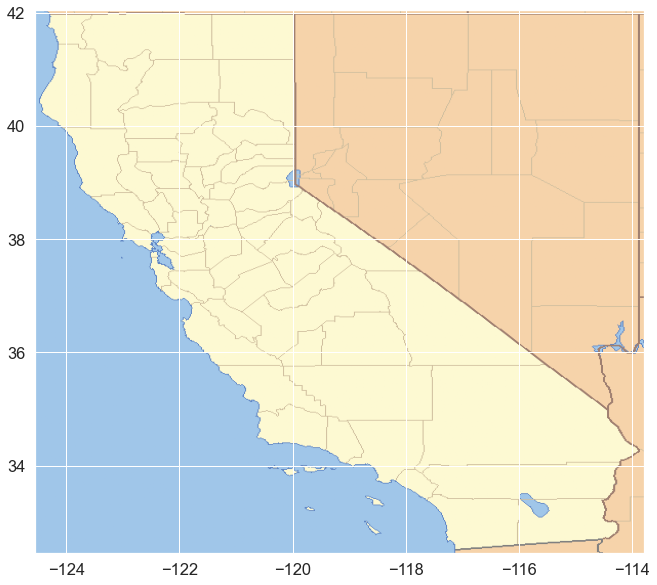

In [25]:
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

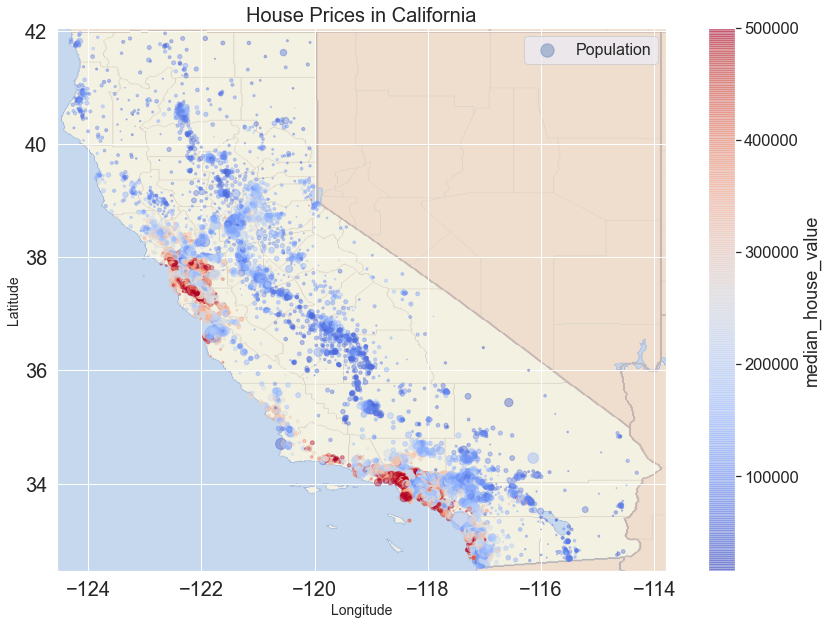

In [26]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

In [27]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [28]:
df_loc = df[df.ocean_proximity == prox[2]].copy()

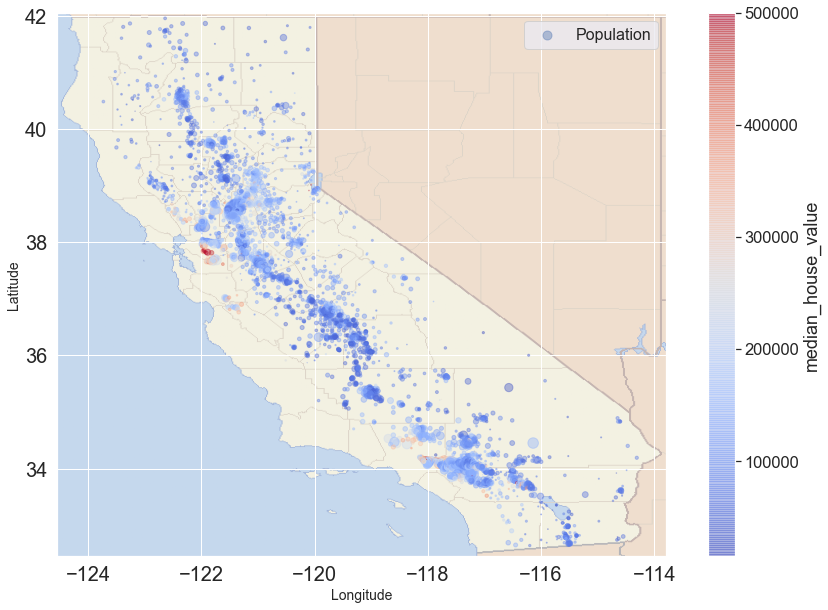

In [29]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Data Analysis with Seaborn

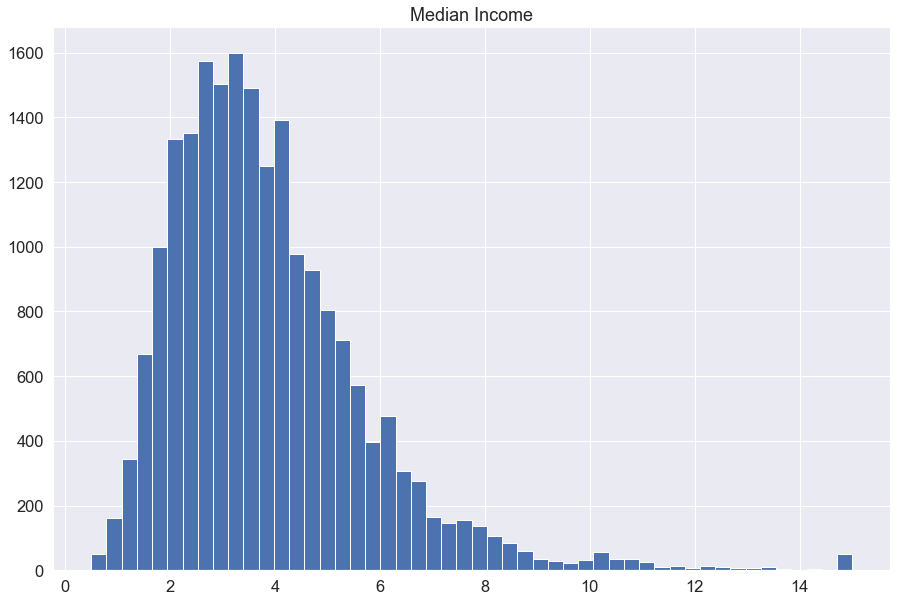

In [30]:
df.median_income.hist(bins=50, figsize=(15,10))
plt.title("Median Income")
plt.show()

In [31]:
pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1])

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20433, dtype: category
Categories (5, interval[float64]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [32]:
df["income_cat"] = pd.qcut(df.median_income, q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"])

In [33]:
df.income_cat

0            Very High
1            Very High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): [Low < Below_Average < Above_Average < High < Very High]

In [34]:
df.income_cat.value_counts(normalize = True)

Above_Average    0.250037
Low              0.250037
Below_Average    0.249988
High             0.199922
Very High        0.050017
Name: income_cat, dtype: float64

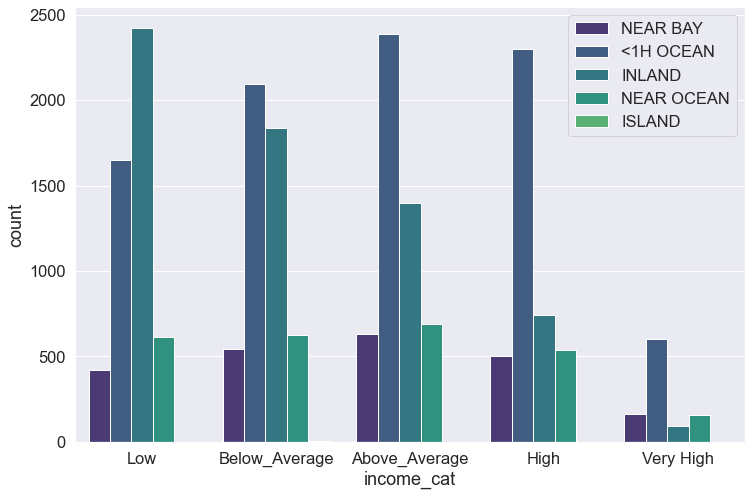

In [35]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

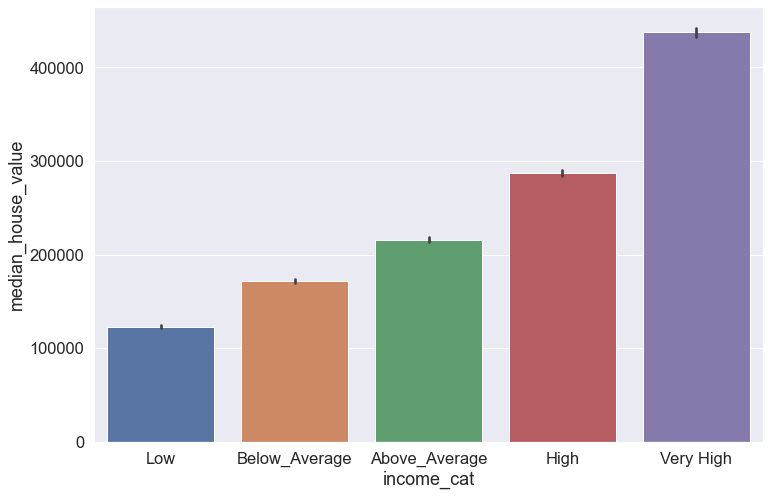

In [36]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

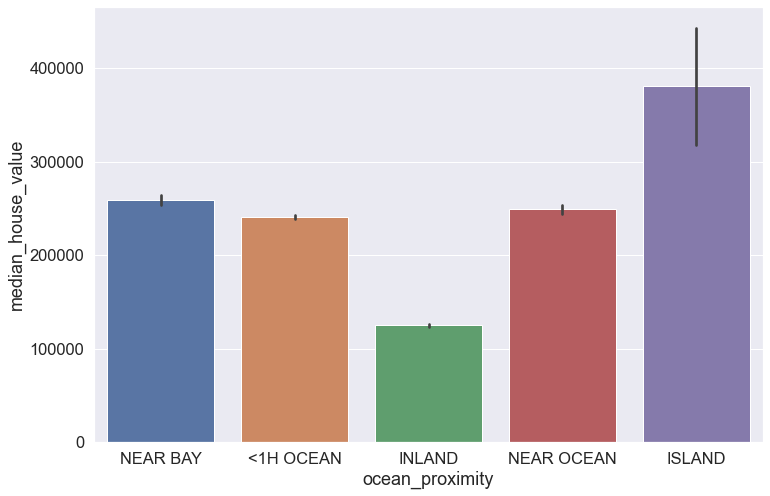

In [37]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

In [38]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])

In [39]:
matrix.astype("int")

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337,84820,155122,148027
Below_Average,197236,115124,220196,208665
Above_Average,232278,147846,261965,255293
High,292208,208095,322566,337446
Very High,439784,347571,451015,468739


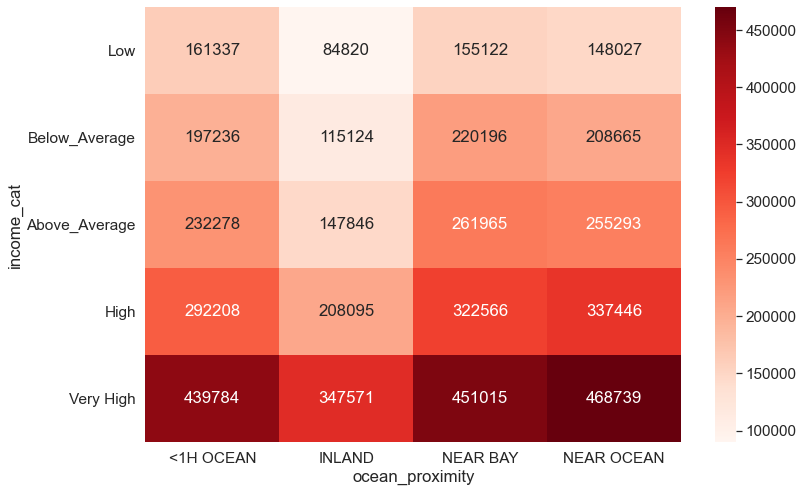

In [40]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

## Feature Engineer

In [41]:
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [42]:
features = df.drop(columns=["median_house_value"])
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,population_per_house,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,Low


In [43]:
features.select_dtypes("float")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209


In [44]:
feat = features.select_dtypes("float").apply(lambda x: stats.zscore(x))

In [45]:
feat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853


In [46]:
pd.options.display.float_format = "{:.2f}".format

In [47]:
feat.agg(['mean','std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [48]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [49]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
dummies = pd.get_dummies(features.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [51]:
features  = pd.concat([feat,dummies,df.income_cat], axis = 1)

In [52]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0,1,0,0,0,Low


In [53]:
test_size = .2

In [54]:
X_test = features.sample(frac = test_size, random_state = 123)

In [55]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
14354,1.17,-1.35,-0.45,-0.10,0.27,-0.13,0.25,-0.39,-0.56,-0.09,0,0,0,0,1,Below_Average
12908,-0.86,1.40,-0.37,0.11,-0.03,-0.12,-0.03,-0.29,0.18,-0.04,0,1,0,0,0,Below_Average
19545,-0.70,0.93,0.82,-0.13,0.16,0.55,0.28,-1.14,-0.62,0.03,0,1,0,0,0,Low
12188,1.11,-0.91,-1.40,-0.64,-0.72,-0.74,-0.81,-0.40,0.42,-0.00,1,0,0,0,0,Below_Average
14786,1.22,-1.43,-0.61,-0.41,-0.58,-0.39,-0.53,0.50,0.16,0.02,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10262,0.85,-0.82,-0.69,0.61,0.01,0.41,0.11,1.43,0.77,0.04,1,0,0,0,0,High
3614,0.58,-0.65,0.74,-0.98,-1.04,-0.90,-1.04,-0.39,-0.21,0.09,1,0,0,0,0,Below_Average
19296,-1.62,1.30,0.90,-0.11,-0.27,-0.33,-0.19,0.01,0.09,-0.06,1,0,0,0,0,Above_Average
5826,0.63,-0.68,1.86,-0.43,-0.62,-0.60,-0.62,0.49,0.43,-0.02,1,0,0,0,0,High


In [56]:
X_test.income_cat.value_counts(normalize = True)

Above_Average   0.25
Below_Average   0.25
Low             0.25
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

In [57]:
features.income_cat.value_counts(normalize = True)

Above_Average   0.25
Low             0.25
Below_Average   0.25
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

In [58]:
X_test.index

Int64Index([14354, 12908, 19545, 12188, 14786,  9941,  3179,  4650, 15550,
            17190,
            ...
             3992, 10261, 10862, 10863, 13864, 10262,  3614, 19296,  5826,
            15383],
           dtype='int64', length=4087)

In [59]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [60]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,0,0,0,1,0,Very High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,0,0,0,1,0,Very High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0,1,0,0,0,Low


In [61]:
X_train.income_cat.value_counts(normalize = True)

Low             0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very High       0.05
Name: income_cat, dtype: float64

In [62]:
X_train = X_train.sample(frac = 1,random_state = 123)

In [63]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,population_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
9896,-1.34,1.24,-1.48,-0.76,-0.90,-0.83,-0.84,1.43,-0.02,-0.04,0,0,0,1,0,High
6749,0.74,-0.71,1.06,-0.00,-0.03,0.06,0.06,0.04,-0.16,-0.02,1,0,0,0,0,Above_Average
13825,1.21,-0.54,0.19,-1.09,-1.15,-1.09,-1.16,-0.92,-0.25,0.03,0,1,0,0,0,Low
2842,0.29,-0.11,0.59,-0.55,-0.63,-0.66,-0.63,-0.47,0.06,-0.04,0,1,0,0,0,Below_Average
10112,0.81,-0.79,0.11,-0.48,-0.55,-0.51,-0.50,0.34,-0.11,-0.03,1,0,0,0,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,1.14,-1.16,-1.40,-0.04,-0.22,-0.42,-0.13,0.10,0.11,-0.09,0,0,0,0,1,Above_Average
1689,-1.34,1.12,-1.88,0.55,0.59,0.55,0.57,0.62,-0.02,-0.02,0,0,0,1,0,High
14698,1.24,-1.33,0.19,-0.28,-0.29,-0.49,-0.30,-0.36,-0.08,-0.08,0,0,0,0,1,Below_Average
19870,0.11,0.33,-1.40,0.27,0.19,-0.07,0.17,-0.47,0.11,-0.07,0,1,0,0,0,Below_Average


In [64]:
X_train.drop(columns = ["income_cat"], inplace = True)

In [65]:
X_test.drop(columns = ["income_cat"], inplace = True)

In [66]:
y_train = label.loc[X_train.index]
y_test = label.loc[X_test.index]

In [67]:
y_train

9896    218100.00
6749    257200.00
13825    64800.00
2842     73100.00
10112   241100.00
           ...   
15460    87500.00
1689    184800.00
14698   177700.00
19870   132000.00
4461    153100.00
Name: median_house_value, Length: 16346, dtype: float64

### Machine learning

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [69]:
forest_reg = RandomForestRegressor(random_state = 42, n_estimators = 850, max_features = "sqrt",
                                   max_depth = 75, min_samples_split = 2)

In [70]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=850,
                      random_state=42)

In [71]:
forest_reg.score(X_train, y_train)

0.9756829073319595

In [72]:
pred = forest_reg.predict(X_train)
pred

array([237571.18470588, 248483.17647059,  76100.58941176, ...,
       183237.53294118, 119616.        , 185654.48117647])

In [73]:
forest_mse = mean_squared_error (y_train,pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18084.82515653947